In [29]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
saved_files_dir = "/cluster/tufts/hugheslab/prath01/results/semi-synthetic/adversarial_prediction_logistic_regression/"
tr_perf_files = glob.glob(os.path.join(saved_files_dir, '*perf.csv'))

In [6]:
precision_train_np = np.zeros(len(tr_perf_files))
precision_valid_np = np.zeros(len(tr_perf_files))
precision_test_np = np.zeros(len(tr_perf_files))

recall_train_np = np.zeros(len(tr_perf_files))
recall_valid_np = np.zeros(len(tr_perf_files))
recall_test_np = np.zeros(len(tr_perf_files))

for ii, f in enumerate(tr_perf_files):
    perf_df = pd.read_csv(f)
    precision_train_np[ii] = perf_df['precision_train'].values[0]
    precision_valid_np[ii] = perf_df['precision_valid'].values[0]
    precision_test_np[ii] = perf_df['precision_test'].values[0]
    recall_train_np[ii] = perf_df['recall_train'].values[0]
    recall_valid_np[ii] = perf_df['recall_valid'].values[0]
    recall_test_np[ii] = perf_df['recall_test'].values[0]

In [14]:
best_ind = np.argmax(precision_valid_np)

perf_df_best = pd.read_csv(tr_perf_files[best_ind])
perf_df_best[['precision_train', 'precision_valid', 'precision_test', 'recall_train', 'recall_valid', 'recall_test']]

,precision_train,precision_valid,precision_test,recall_train,recall_valid,recall_test
0,0.730769,0.678571,0.755814,0.554745,0.666667,0.59633


In [18]:
training_hist_df = pd.read_csv(tr_perf_files[best_ind].replace('_perf.csv', 'training_hist.csv'))

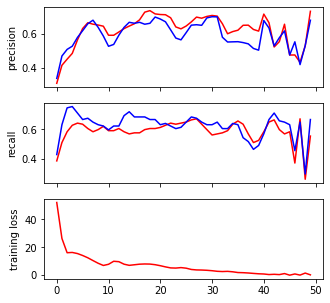

In [30]:
f, axs = plt.subplots(3, 1, figsize=(5, 5), sharex=True)
axs[0].plot(training_hist_df['epoch'], training_hist_df['precision_train'], 'r')
axs[0].plot(training_hist_df['epoch'], training_hist_df['precision_valid'], 'b')
axs[0].set_ylabel('precision')

axs[1].plot(training_hist_df['epoch'], training_hist_df['recall_train'], 'r')
axs[1].plot(training_hist_df['epoch'], training_hist_df['recall_valid'], 'b')
axs[1].set_ylabel('recall')

axs[2].plot(training_hist_df['epoch'], training_hist_df['loss'], 'r')
axs[2].set_ylabel('training loss')

plt.show()

In [31]:
training_hist_df['precision_train']

0     0.311765
1     0.416667
2     0.451977
3     0.485876
4     0.564103
5     0.630435
6     0.664000
7     0.655738
8     0.650794
9     0.643939
10    0.591241
11    0.591241
12    0.610294
13    0.629921
14    0.644628
15    0.658333
16    0.681034
17    0.725664
18    0.734513
19    0.715517
20    0.711864
21    0.710744
22    0.692913
23    0.639706
24    0.628571
25    0.644928
26    0.669118
27    0.696970
28    0.690476
29    0.700855
30    0.706422
31    0.702703
32    0.658333
33    0.600000
34    0.612676
35    0.620690
36    0.649254
37    0.650000
38    0.625000
39    0.615385
40    0.714286
41    0.664179
42    0.522989
43    0.554054
44    0.655462
45    0.476190
46    0.476636
47    0.433962
48    0.529412
49    0.730769
Name: precision_train, dtype: float64